<h1>Final Assignment </h1
>

<h1>Task 1</h1>

In [89]:
import xml.etree.ElementTree as ET
import pandas as pd
import numpy as np
import os


In [90]:
Employee_data={"Name":[],"Age":[],"Department":[]}

file='data.xml'

tree=ET.parse(file)
root=tree.getroot()
for child in root:
    print(child.tag)
    for i in child:
        for x in i:
            if x.tag == 'Name':
                Employee_data['Name'].append(x.text)
            elif x.tag == 'Age':
                Employee_data['Age'].append(x.text)
            elif x.tag == 'Department':
                Employee_data['Department'].append(x.text)


Employee_data
Data=pd.DataFrame(Employee_data)

Data

Employees


,Name,Age,Department
0,John Doe,29,HR
1,Jane Smith,34,Engineering
2,Emily Davis,41,Marketing
3,Michael Brown,37,Engineering
4,Laura Wilson,45,Finance
5,David Johnson,31,HR
6,Emma Garcia,27,Engineering
7,Oliver Martinez,50,Marketing
8,Lucas Anderson,39,Finance
9,Sophia Taylor,28,Engineering


<h1>Task2</h1>

In [98]:
import re
from pdfminer.high_level import extract_text

report_path = 'report.pdf'  
Extracted_path = 'extracted_info.csv' 
text = extract_text(report_path)

email_pattern = r'[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}'
date_pattern = r'\b\d{4}-\d{2}-\d{2}\b'

emails = re.findall(email_pattern, text)
dates = re.findall(date_pattern, text)


# Ensure both lists have the same length
max_len = max(len(emails), len(dates))
emails.extend([None] * (max_len - len(emails)))
dates.extend([None] * (max_len - len(dates)))

data = {
    "Emails": emails,
    "Dates": dates
}
Company_data = pd.DataFrame(data)
Company_data.to_csv(Extracted_path, index=False)




# Display the DataFrame
print(Company_data)


                           Emails       Dates
0            john.doe@example.com  2024-10-12
1          jane.smith@company.com  2024-11-15
2       emily.davis@marketing.com  2024-12-20
3   michael.brown@engineering.com  2024-11-05
4        laura.wilson@finance.com  2025-01-20
5                  hr@example.com  2024-12-10
6         engineering@company.com  2024-11-01
7           marketing@company.com  2024-12-15
8             finance@company.com  2024-12-20
9            john.doe@example.com  2025-01-15
10         jane.smith@company.com  2025-02-10
11  michael.brown@engineering.com  2024-10-12
12       laura.wilson@finance.com  2024-11-15
13      emily.davis@marketing.com  2024-12-20
14           john.doe@example.com  2024-12-10
15         jane.smith@company.com  2024-11-01
16      emily.davis@marketing.com  2024-12-15
17  michael.brown@engineering.com        None


<h1>Task 3</h1>

In [99]:

path2 = "/home/raqeeb/My_data/3rd_Semester/Programming_for_AI_Lab/Programmin_For_AI/final_assignment/food"

files_diction={"File Name":[],"Word Count":[]}


for i in os.listdir(path2):
    if i.endswith('txt'):
        with open(os.path.join(path2, i), 'r') as file:
            content = file.read()
            word_count = len(content.split())
            files_diction["File Name"] .append(i)
            files_diction['Word Count'].append(word_count)

files_diction=pd.DataFrame(files_diction)

files_diction


,File Name,Word Count
0,food_42.txt,131
1,food_5.txt,136
2,food_81.txt,264
3,food_86.txt,594
4,food_48.txt,258
...,...,...
95,food_56.txt,236
96,food_31.txt,274
97,food_7.txt,223
98,food_96.txt,327


<h1>Task 4  and 5</h1>


<h3>Normalization of Data</h3>

In [100]:
# Normalization
files_diction['Word Count'] = pd.to_numeric(files_diction['Word Count'])
files_diction['Normalized Word Count'] = (files_diction['Word Count'] - files_diction['Word Count'].min()) / (files_diction['Word Count'].max() - files_diction['Word Count'].min())
files_diction



,File Name,Word Count,Normalized Word Count
0,food_42.txt,131,0.074
1,food_5.txt,136,0.084
2,food_81.txt,264,0.340
3,food_86.txt,594,1.000
4,food_48.txt,258,0.328
...,...,...,...
95,food_56.txt,236,0.284
96,food_31.txt,274,0.360
97,food_7.txt,223,0.258
98,food_96.txt,327,0.466


In [101]:
Data['Age'] = pd.to_numeric(Data['Age'], errors='coerce')
Data['Normalized_age']=(Data['Age']-Data['Age'].min())/(Data['Age'].max()-Data['Age'].min())
Data

,Name,Age,Department,Normalized_age
0,John Doe,29,HR,0.16
1,Jane Smith,34,Engineering,0.36
2,Emily Davis,41,Marketing,0.64
3,Michael Brown,37,Engineering,0.48
4,Laura Wilson,45,Finance,0.80
5,David Johnson,31,HR,0.24
6,Emma Garcia,27,Engineering,0.08
7,Oliver Martinez,50,Marketing,1.00
8,Lucas Anderson,39,Finance,0.56
9,Sophia Taylor,28,Engineering,0.12


In [102]:
files_diction.describe()


,Word Count,Normalized Word Count
count,100.00000,100.000000
mean,226.47000,0.264940
std,85.22086,0.170442
min,94.00000,0.000000
25%,163.00000,0.138000
50%,217.50000,0.247000
75%,266.25000,0.344500
max,594.00000,1.000000


<h3>Visualization Of Data</h3>

Analysis of Data
Mean Age: 35.421052631578945
Median Age: 34.0
Standard Deviation of Age: 7.1516570688484045


Analysis of Company Data
Mean Date: 2024-12-04 00:00:00
Median Date: 2024-12-10 00:00:00
Standard Deviation of Dates: 34 days 11:52:10.397791493




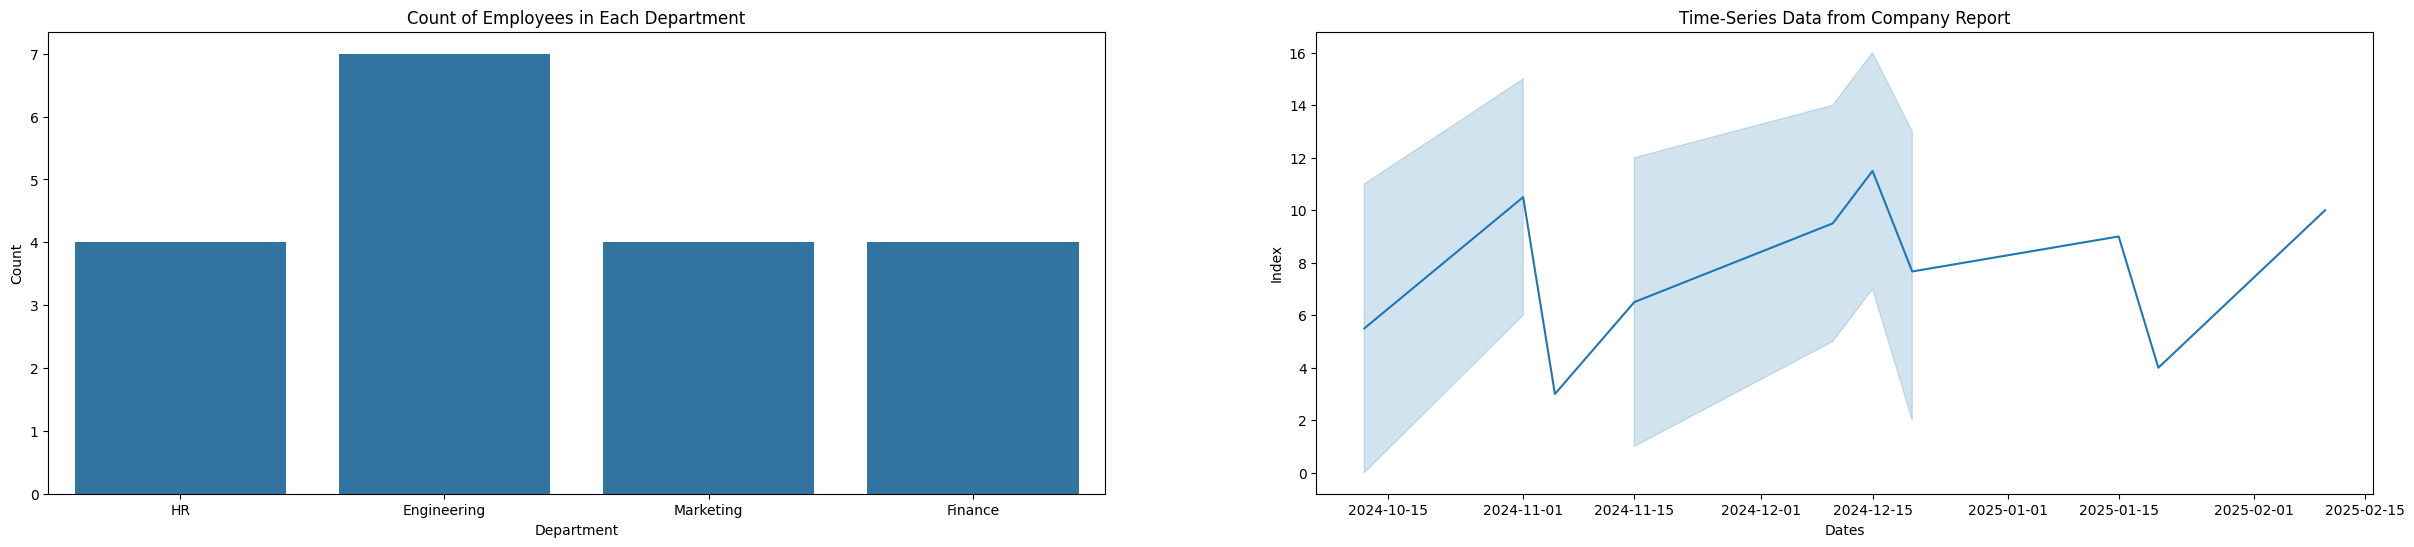

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


# Drop rows with NaN values in 'Age' column
Data = Data.dropna(subset=['Age'])

mean_age = Data['Age'].mean()
median_age = Data['Age'].median()
std_age = Data['Age'].std()

print("Analysis of Data")
print(f"Mean Age: {mean_age}")
print(f"Median Age: {median_age}")
print(f"Standard Deviation of Age: {std_age}\n\n")

# Convert 'Dates' column to datetime
Company_data['Dates'] = pd.to_datetime(Company_data['Dates'], errors='coerce')

mean_date = Company_data['Dates'].mean()
median_date = Company_data['Dates'].median()
std_date = Company_data['Dates'].std()

print("Analysis of Company Data")
print(f"Mean Date: {mean_date}")
print(f"Median Date: {median_date}")
print(f"Standard Deviation of Dates: {std_date}\n\n")

# Bar plot showing the count of employees in each department
plt.figure(figsize=(30, 6))
plt.subplot(1,2,1)

sns.countplot(data=Data, x='Department')
plt.title('Count of Employees in Each Department')
plt.xlabel('Department')
plt.ylabel('Count')

# Line chart for time-series data from Company_data
plt.subplot(1,2,2)

sns.lineplot(data=Company_data, x='Dates', y=Company_data.index)
plt.title('Time-Series Data from Company Report')
plt.xlabel('Dates')
plt.ylabel('Index')
plt.show()




<h2>Their is no such relation between the numerical columns for heatmap graph</h2>

<h1>THANK YOU SIR !</h1>